###Name: Akshat Dobriyal
###Roll: 201951016


# Problem Statement: 
* In the industry retaining customers is going challenging day by day and acquire new customers is even draining so retaining the existing customers is highly worths every effort than acquiring new customers.
* Know the customer behavior and recommend the steps to retain existing customers.


# Imports

In [ ]:
# Customer Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS312_project/telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


# Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Customer Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fa4866950>,
      dtype=object)

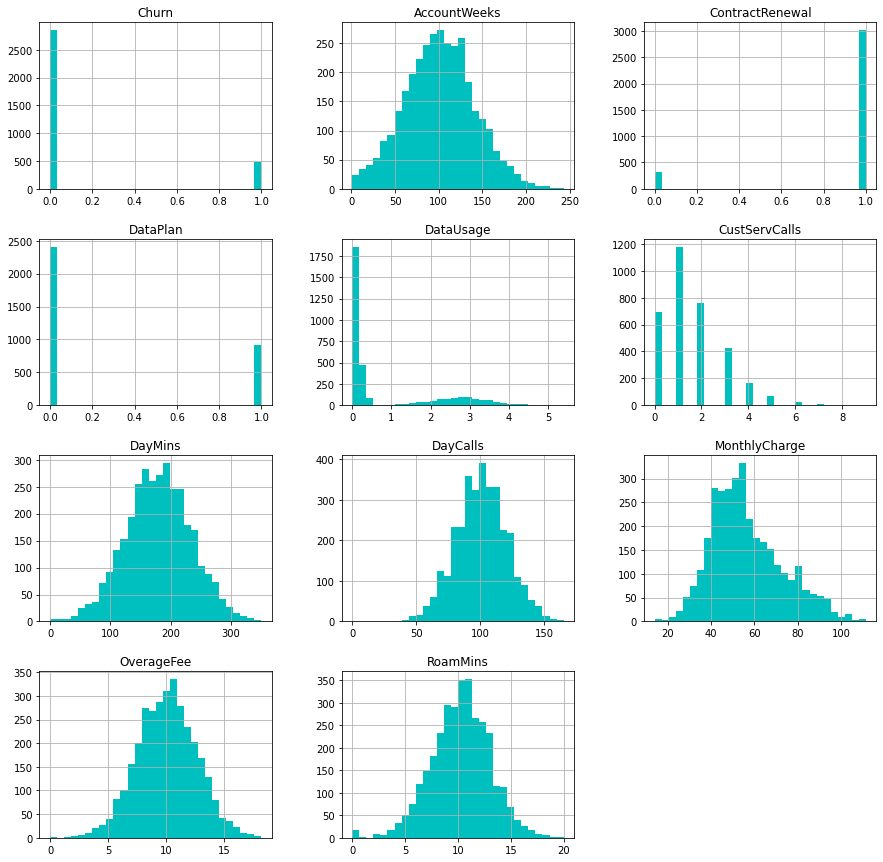

In [ ]:
df.hist(figsize=(15,15), bins=30, color='c')

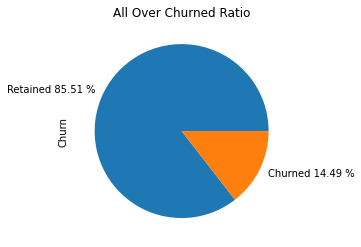

In [ ]:
df["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

In [ ]:
# Random under-sampleing
df2 = df.loc[df['Churn']==0].sample(n=483).copy()
# All Churned Customers
df3 = df.loc[df['Churn']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)
df4


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,171,1,0,0.00,1,270.5,69,66.0,11.50,9.6
1,1,159,1,0,0.00,2,275.8,103,63.0,9.48,7.4
2,0,68,1,1,2.59,2,122.9,93,66.9,11.68,9.6
3,0,98,1,0,0.39,2,136.1,82,40.9,7.82,10.1
4,1,103,1,1,2.94,6,87.2,92,59.4,8.47,10.9
...,...,...,...,...,...,...,...,...,...,...,...
961,0,133,1,1,1.81,5,239.9,107,81.1,12.69,6.7
962,0,107,1,0,0.00,0,133.8,85,39.0,9.03,8.9
963,0,130,1,0,0.00,1,120.5,127,37.0,9.49,14.3
964,1,98,1,0,0.38,5,227.1,116,52.8,6.03,4.7


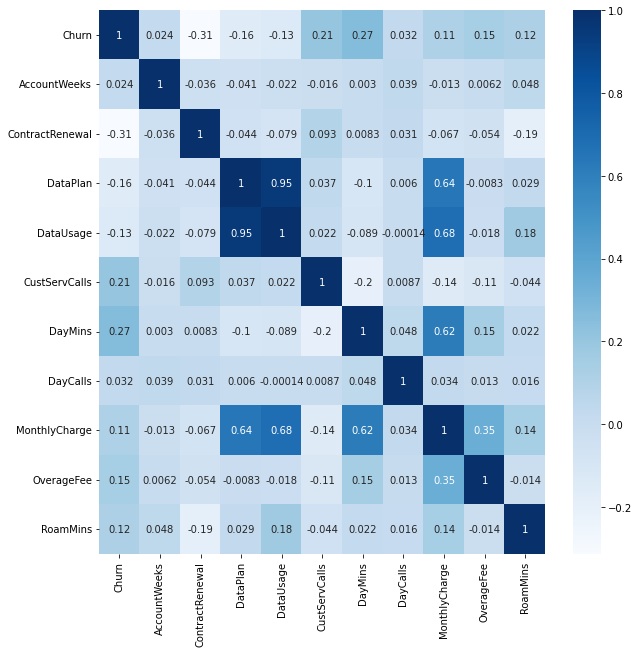

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, cmap='Blues')

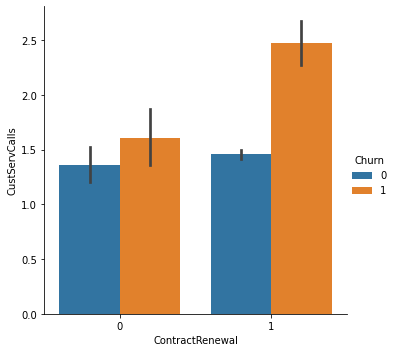

In [ ]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)

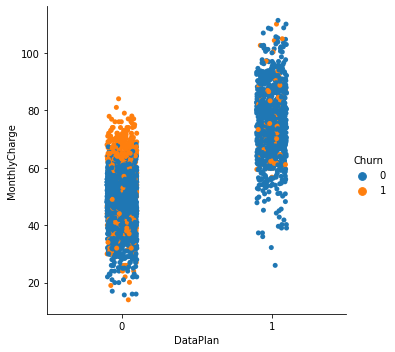

In [ ]:
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn",kind="strip" ,data=df)

**In the data usage case also we can easily consider two segments.
Consider the segment as below,**
1. Customers whose data usage is 0-1.
2. Customers whose data usage is >1.

# Customer Segmentation

In [ ]:
# Manual Customer Segmentaion
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Customers in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

In [ ]:
print(f"Number of customers in segment 1: {len(seg1)}")
print(f"Number of customers in segment 2: {len(seg2)}")

Number of customers in segment 1: 2420
Number of customers in segment 2: 913


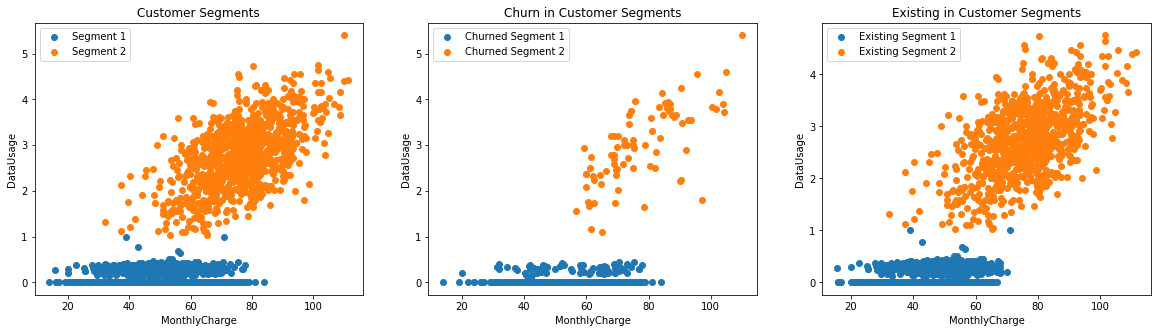

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DataUsage'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DataUsage'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DataUsage'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DataUsage'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DataUsage'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DataUsage'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

In [ ]:
# % of customer churn in seg1 
seg1["Churn"].value_counts(normalize=True) * 100

0    83.347107
1    16.652893
Name: Churn, dtype: float64

In [ ]:
# % of customer having data plan in seg1 
(seg1["DataPlan"].value_counts(normalize=True) * 100)

0    99.628099
1     0.371901
Name: DataPlan, dtype: float64

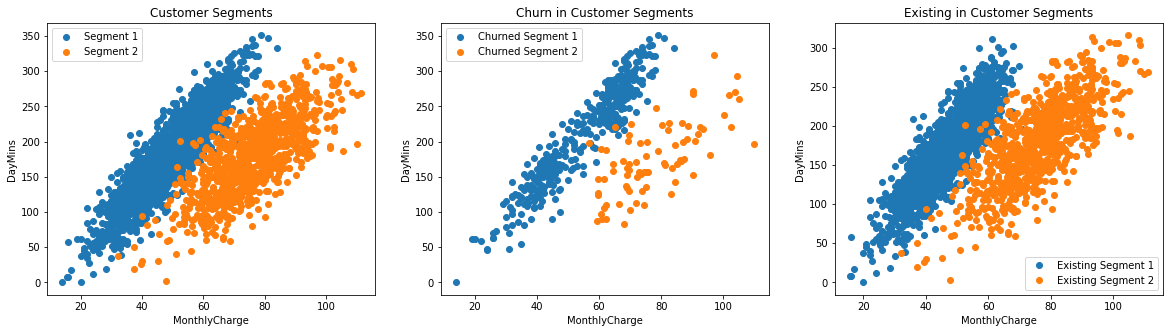

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DayMins'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DayMins'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DayMins'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DayMins'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DayMins'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DayMins'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

### More on zero data usage customers

Text(0.5, 1.0, 'Churn=0&1')

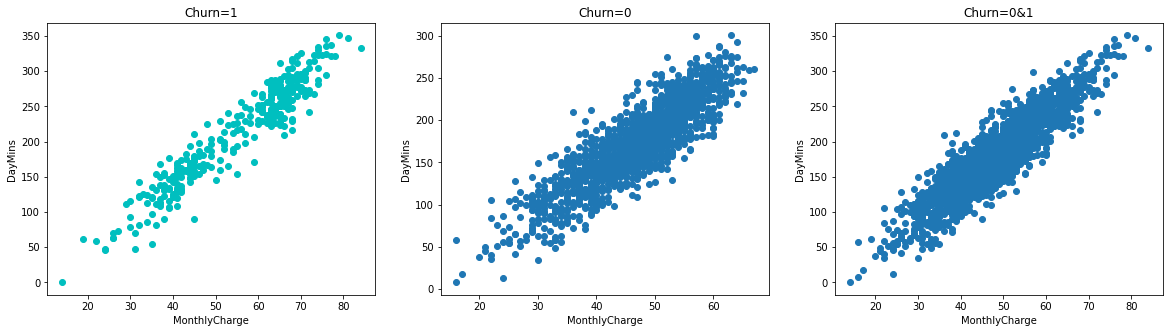

In [ ]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

In [ ]:
dataus0

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3322,1,62,1,0,0.0,4,321.1,105,78.0,13.28,11.5
3324,0,159,1,0,0.0,1,169.8,114,46.0,9.89,11.6
3327,0,79,1,0,0.0,2,134.7,98,40.0,9.49,11.8
3330,0,28,1,0,0.0,2,180.8,109,56.0,14.44,14.1


In [ ]:
# % churn in customers with zero data usage in seg1
dataus0['Churn'].value_counts(normalize=True) * 100

0    82.239382
1    17.760618
Name: Churn, dtype: float64

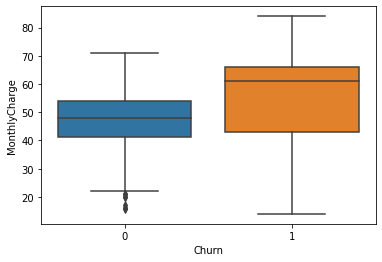

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1)

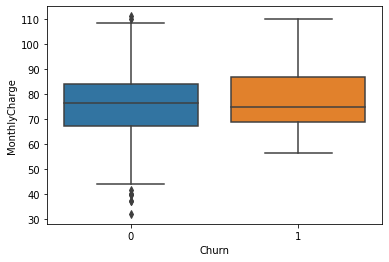

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

#**Hypothesis Testing**

###**Null Hypothesis:** The mean number of customer service calls for churned customers and retained customers is equal.

###**Alternate Hypothesis:** The mean number of customer service calls for churned customers and retained customers is unequal.

##**Two sample t-test** 

In [ ]:
data_churn = df.loc[(df['Churn']==1)]['CustServCalls'][:25]
data_retain = df.loc[(df['Churn']==0)]['CustServCalls'][:25]

In [ ]:
print(f"Estimating Sample Variance: {np.var(data_churn)}")
print(f"Estimating Sample Variance: {np.var(data_retain)}")

Estimating Sample Variance: 3.2895999999999996
Estimating Sample Variance: 1.6576000000000002


In [ ]:
print(f"Estimating Sample Variance: {np.var(data_churn)/np.var(data_retain)}")

Estimating Sample Variance: 1.9845559845559841


In [ ]:
import scipy.stats as stats

#perform two sample t-test with equal variances
statistic, p_value = stats.ttest_ind(a=data_churn, b=data_retain, equal_var=True)
print(f"The t test statistic is {statistic} and the corresponding two-sided p-value is {p_value}")

The t test statistic is 2.6430606743567537 and the corresponding two-sided p-value is 0.011063349409175433


So as the p value is less than alpha(0.05), we reject the null hypothesis. Therefore, the number of customer service calls is an indication for the company that the customer may churn.

# Conclusion
## Steps to Retain Customers
* More Customer Service calls mean the customer is more prone to churn.
* Optimize the price of talk time for segment 1 customers.
* Introduce a data plan to those customers who are using data without data plans ASAP.
* Introduce exciting data plans to segment 1 customers.
* If the possible optimizing price of data plans can retain segment 2 customers also.
---